In [3]:
import json
import re

In [19]:
# with open('results_5epochs.json') as f:
#     results = json.load(f)['results']
# for result in results:
#     hosts, batch_size = regex.search(result['command']).groups()
#     result['batch_size'] = int(batch_size)
#     result['nodes'] = len(set(hosts.split(',')))
#     result['processes_per_node'] = int(len(hosts.split(','))/len(set(hosts.split(','))))
#     result['threads_per_process'] = 1
# with open('results_5epochs.json', 'w') as f:
#     json.dump({'results': results}, f)   
#
# with open('results_3epochs.json') as f:
#     results = json.load(f)['results']
# for result in results:
#     hosts, batch_size = regex.search(result['command']).groups()
#     result['batch_size'] = int(batch_size)
#     result['nodes'] = len(set(hosts.split(',')))
#     result['processes_per_node'] = int(len(hosts.split(','))/len(set(hosts.split(','))))
#     result['threads_per_process'] = 1
# with open('results_3epochs.json', 'w') as f:
#     json.dump({'results': results}, f)   

In [72]:
import numpy as np
import matplotlib.pyplot as plt

with open('results_5epochs.json') as f:
     results = json.load(f)['results']

In [131]:
def plot_seconds_for_batch_size(batch_size=None):
    nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    processes_per_node = [1, 2, 3, 4]
    
    seconds = np.zeros((len(processes_per_node), len(nodes)))

    for result in results:
        if batch_size is None or result['batch_size'] == batch_size:
            seconds[result['processes_per_node']-1, result['nodes']-1] += result['seconds']
    
    if batch_size is None:
        seconds /= 4

    fig, ax = plt.subplots()
    im = ax.imshow(seconds, origin='lower')
    plt.set_cmap('autumn_r')


    ax.set_yticks(np.arange(len(processes_per_node)))
    ax.set_xticks(np.arange(len(nodes)))

    ax.set_yticklabels(processes_per_node)
    ax.set_xticklabels(nodes)
    
    ax.set_ylabel('# of processes per node')
    ax.set_xlabel('# of nodes')

    for i in range(len(processes_per_node)):
        for j in range(len(nodes)):
            text = ax.text(
                j, 
                i, 
                f'{seconds[i, j]:.1f}',
                ha="center", 
                va="center", 
                color="black"
            )

    ax.set_title(f'Training time in seconds (batch_size = {batch_size})')
    fig.tight_layout()
    plt.show()
    fig.savefig(f'training_time_{batch_size}.png')

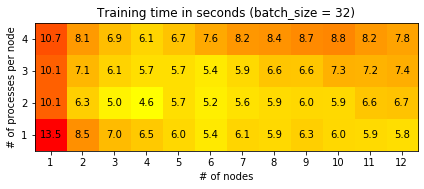

In [132]:
plot_seconds_for_batch_size(32)

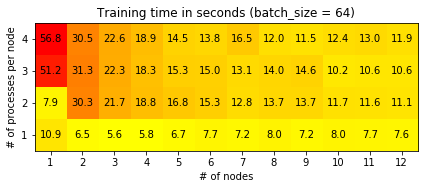

In [133]:
plot_seconds_for_batch_size(64)

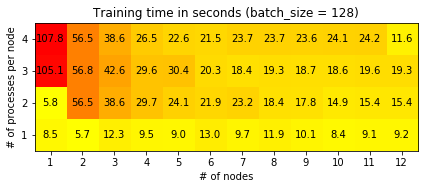

In [134]:
plot_seconds_for_batch_size(128)

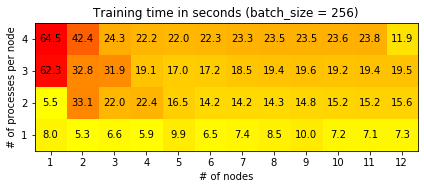

In [135]:
plot_seconds_for_batch_size(256)